## AutoEncode 노이즈 제거
---
- 데이터 노이즈 제거 활용
- 데이터에서 주요 특징만 추출, 압축하기 때문에 노이즈는 제거됨
- 압축된 주요 특징으로 데이터 복원 > 노이즈 제거

AutoEncoder ( Transfer Learning )
- 노이즈 제거
- 표현(특징) 학습
    - 데이터에서 주요 특징을 찾아 앞축 후 복원하는 학습 모델
- 구성
    - 인코더 : 입력 데이터에서 주요 특징을 추출
    - 디코더 : 주요 특징에서 원 데이터로 복원

In [1]:
import PIL.Image as Image
def pre_img(path):

    # 이미지 불러오기
    test_image=Image.open(path).resize((540,420))
    test_image = test_image.convert('L')
    test_image_arr=np.array(test_image).reshape(420,540,1)/255.0
    
#     # 이미지 그래프로 그리기
#     plt.imshow(test_image)
#     plt.show()

    return test_image_arr

In [2]:
import os 
import numpy as np
data_dir = './Noisy_Documents/'
data_names = os.listdir(data_dir+'noisy/')
input_data = np.array([pre_img(data_dir +'noisy/'+name) for name in data_names])
target_data = np.array([pre_img(data_dir +'clean/'+name) for name in data_names])


In [3]:
print(input_data.shape, target_data.shape)

(216, 420, 540, 1) (216, 420, 540, 1)


In [4]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(input_data, target_data, random_state=493)

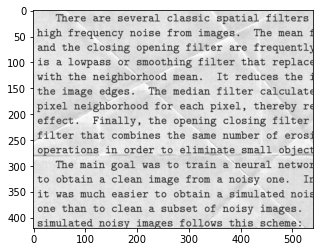

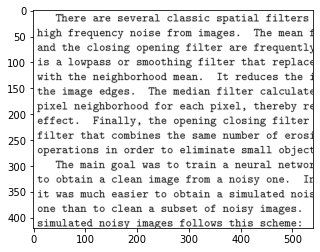

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0], cmap ='gray')
plt.show()
plt.imshow(train_y[0], cmap ='gray')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 420, 540, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 210, 270, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 210, 270, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 105, 135, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 105, 135, 128)     73856     
                                                                 
 conv2d_transpose (Conv2DTra  (None, 105, 135, 64)     7

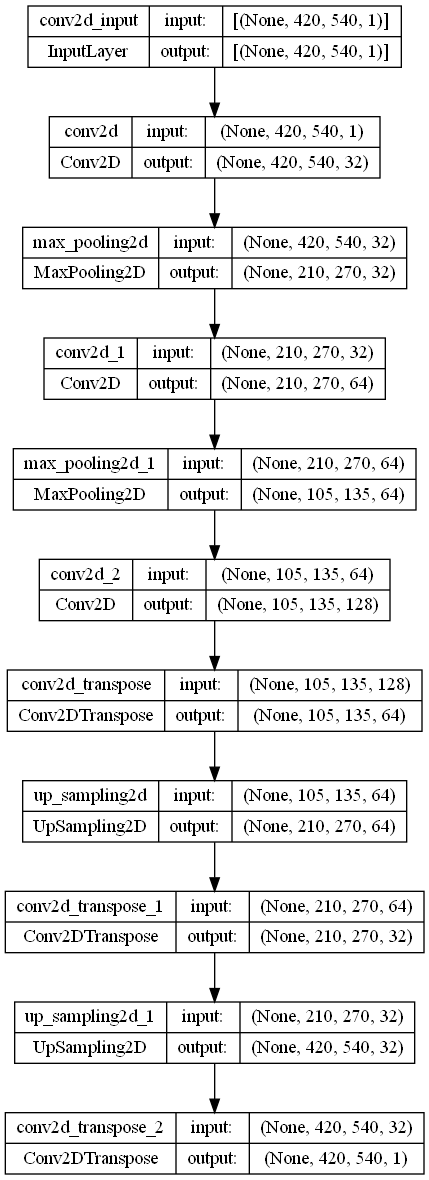

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Reshape, Flatten, Dense
from tensorflow.keras.utils import plot_model, set_random_seed
def make_model():
    set_random_seed(493)
    model = Sequential()
#     encoder

    model.add(Conv2D(filters = 32, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(filters = 64, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    model.add(MaxPooling2D())  
    
    model.add(Conv2D(filters = 128, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    
#     병목층
#     model.add(Flatten())
#     model.add(Dense(
#         100,
#         activation = 'relu'
#    ))
#     model.add(Dense(
#         35*45*128,
#         activation = 'relu'
#    ))
#     model.add(Reshape((70, 90, 128)))
#     decoder
    model.add(Conv2DTranspose(
        64,3,padding='same',
        activation = 'relu')
             )
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(
        32,3,padding='same',
        activation = 'relu')
             )
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(filters = 1, kernel_size=3, padding='same', activation='sigmoid'))
    
    model.summary()    
    model.compile(
        optimizer='adam',
        loss = 'binary_crossentropy',
        metrics = 'mean_squared_error'
    )
    
    return model

model1 = make_model()
plot_model(model1,show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 420, 540, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 210, 270, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 210, 270, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 105, 135, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 105, 135, 128)     73856     
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 210, 270, 64)    

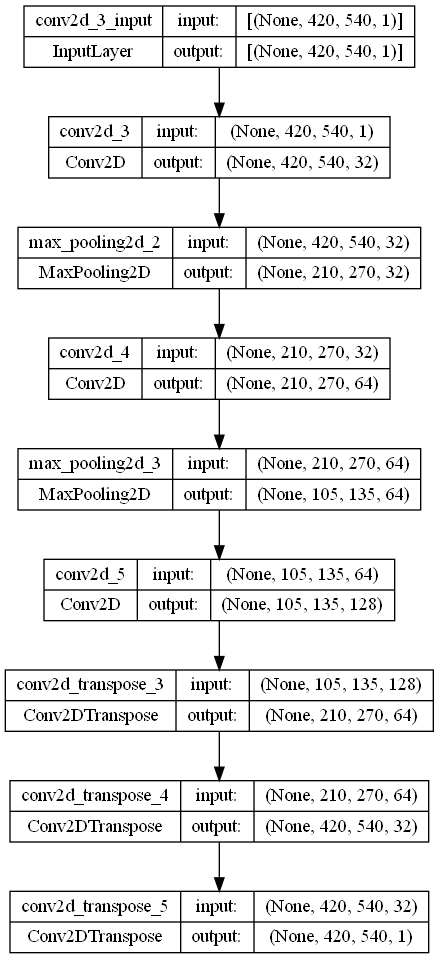

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Reshape, Flatten, Dense
from tensorflow.keras.utils import plot_model, set_random_seed
def make_model2():
    set_random_seed(493)
    model = Sequential()
#     encoder

    model.add(Conv2D(filters = 32, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(filters = 64, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    model.add(MaxPooling2D())  
    
    model.add(Conv2D(filters = 128, kernel_size=3, padding='same', input_shape =(420, 540,1),activation = 'relu'
   ))
    
#     병목층
#     model.add(Flatten())
#     model.add(Dense(
#         100,
#         activation = 'relu'
#    ))
#     model.add(Dense(
#         35*45*128,
#         activation = 'relu'
#    ))
#     model.add(Reshape((105, 135, 128)))
#     decoder
    model.add(Conv2DTranspose(
        64,3,padding='same',
        activation = 'relu',
        strides = 2
     ))
#     model.add(UpSampling2D((3,3)))
    model.add(Conv2DTranspose(
        32,3,padding='same',
        activation = 'relu',
        strides = 2
     ))
#     model.add(UpSampling2D())
    model.add(Conv2DTranspose(
        filters = 1, 
        kernel_size=3, 
        padding='same', 
        activation='sigmoid'
    ))
    
    model.summary()    
    model.compile(
        optimizer='adam',
        loss = 'binary_crossentropy',
        metrics = 'mean_squared_error'
    )
    
    return model

model2 = make_model2()
plot_model(model2,show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_cb = EarlyStopping(monitor = 'val_loss', patience = 4)
mc_cb1 = ModelCheckpoint(monitor= 'val_loss', filepath = './hw2_model6.h5',save_best_only=False)
mc_cb2 = ModelCheckpoint(monitor= 'val_loss', filepath = './hw2_model3.h5',save_best_only=False)

result1 = model1.fit(train_x, train_y,
         validation_split=0.2,
         epochs = 200,
         callbacks=[es_cb,mc_cb1])



Epoch 1/200
5/5 [==============================] - 256s 44s/step - loss: 0.5671 - mean_squared_error: 0.1613 - val_loss: 0.4251 - val_mean_squared_error: 0.0746
Epoch 2/200
5/5 [==============================] - 220s 42s/step - loss: 0.4108 - mean_squared_error: 0.0764 - val_loss: 0.3698 - val_mean_squared_error: 0.0758
Epoch 3/200
5/5 [==============================] - 216s 42s/step - loss: 0.3774 - mean_squared_error: 0.0789 - val_loss: 0.3418 - val_mean_squared_error: 0.0680
Epoch 4/200
5/5 [==============================] - 211s 41s/step - loss: 0.3541 - mean_squared_error: 0.0715 - val_loss: 0.3292 - val_mean_squared_error: 0.0655
Epoch 5/200
5/5 [==============================] - 214s 41s/step - loss: 0.3365 - mean_squared_error: 0.0679 - val_loss: 0.3116 - val_mean_squared_error: 0.0628
Epoch 6/200
5/5 [==============================] - 218s 42s/step - loss: 0.3153 - mean_squared_error: 0.0649 - val_loss: 0.2957 - val_mean_squared_error: 0.0568
Epoch 7/200
5/5 [=================

In [ ]:
result2 = model2.fit(train_x, train_y,
         validation_split=0.2,
         epochs = 200,
         callbacks=[es_cb,mc_cb2])

In [ ]:

for k in result1.history.keys():
    plt.plot(result1.epoch, result1.history[k], label = k)
    
plt.legend()
plt.show()

for k in result2.history.keys():
    plt.plot(result2.epoch, result2.history[k], label = k)
    
plt.legend()
plt.show()

In [7]:
from tensorflow.keras.models import save_model, load_model
# model1 = load_model('./hw2_model6.h5')
print(model1.evaluate(test_x,test_y))
print(model2.evaluate(test_x,test_y))

2/2 [==============================] - 34s 13s/step - loss: 0.2420 - mean_squared_error: 0.0499
[0.2419678121805191, 0.04988721013069153]


In [8]:
pred1 = model1.predict(test_x[[0]])
pred2 = model2.predict(test_x[[0]])

1/1 [==============================] - 1s 1s/step


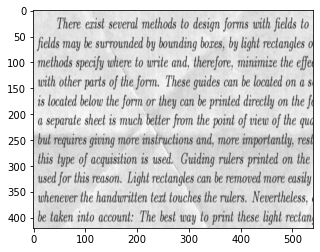

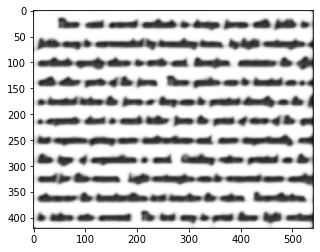

In [11]:
plt.imshow(test_x[0], cmap ='gray')
plt.show()
plt.imshow(pred1[0], cmap ='gray')
plt.show()
plt.imshow(pred2[0], cmap ='gray')
plt.show()

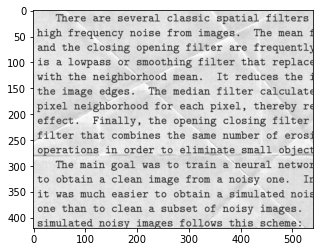

1/1 [==============================] - 1s 526ms/step


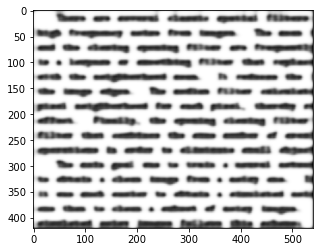

In [12]:
plt.imshow(train_x[0], cmap ='gray')
plt.show()
plt.imshow(model1.predict(train_x[[0]])[0], cmap ='gray')
plt.show()
plt.imshow(model2.predict(train_x[[0]])[0], cmap ='gray')
plt.show()

In [ ]:
# from tensorflow.keras.models import save_model, load_model
# save_model(model, './hw2_model_f.h5')